
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Introduction to Python for Data Sciences</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a> </td>
</tr>
</table>



<br/><br/>

<center><a style="font-size: 40pt; font-weight: bold">Chap. 3 - Data Handling with Pandas </a></center> 

<br/><br/>




# 2- Dataframes

## Operations

In [2]:
import numpy as np
import pandas as pd

### Numpy operations


If we apply a NumPy function on a Pandas datframe, the result will be another Pandas dataframe with the indices preserved.

In [4]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,8,7,2,7
1,4,7,6,1
2,3,5,7,2


In [5]:
np.cos(df * np.pi/2 ) - 1

,A,B,C,D
0,0.0,-1.0,-2.0,-1.0
1,0.0,-1.0,-2.0,-1.0
2,-1.0,-1.0,-1.0,-2.0


### Arithmetic operations

Arithmetic operations can also be performed either with <tt>+ - / *</tt> or with dedicated <tt>add multiply</tt> etc methods

In [6]:
A = pd.DataFrame(np.random.randint(0, 20, (4, 2)), columns=list('AB'))
A

,A,B
0,5,3
1,1,3
2,12,16
3,8,11


In [7]:
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=list('BAC'))
B

,B,A,C
0,0,9,4
1,7,2,5
2,0,2,1


In [8]:
A+B

,A,B,C
0,14.0,3.0,NaN
1,3.0,10.0,NaN
2,14.0,16.0,NaN
3,NaN,NaN,NaN


The pandas arithmetic functions also have an option to fill missing values by replacing the missing one in either of the dataframes by some value.

In [10]:
A.add(B, fill_value=0.0)

,A,B,C
0,14.0,3.0,4.0
1,3.0,10.0,5.0
2,14.0,16.0,1.0
3,8.0,11.0,NaN


## Concatenating, and Merging

Thanks to naming, dataframes can be easily added, merged, etc. However, if some entries are missing (columns or indices), the operations may get complicated. Here the most standard situations are covered, take a look at the documentation (notably [this one on merging, appending, and concatenating](https://pandas.pydata.org/pandas-docs/stable/merging.html) )

* **Concatenating** is for adding lines and/or columns of multiples datasets (it is a generalization of appending)

In [11]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)), columns=list('AB'))
A2 = pd.DataFrame(np.random.randint(0, 20, (3, 2)), columns=list('AB'))
A3 = pd.DataFrame(np.random.randint(0, 20, (2, 3)), columns=list('CAD'))
print("A:\n",A,"\nA2:\n",A2,"\nA3:\n",A3)

A:
     A   B
0   6   5
1  19  19 
A2:
     A   B
0   0  18
1  18   9
2  18  16 
A3:
     C   A  D
0   5  11  3
1  17   8  2


The most important settings of the <tt>concat</tt> function are <tt>pd.concat(objs, axis=0, join='outer',ignore_index=False)</tt> where <br/>
. *objs* is the list of dataframes to concatenate <br/>
. *axis* is the axis on which to concatenate 0 (default) for the lines and 1 for the columns <br/>
. *join* is to decide if we keep all columns/indices on the other axis ('outer' ,default), or the intersection ( 'inner') <br/>
. *ignore_index* is to decide is we keep the previous names (False, default) or give new ones (True)


For a detailed view see  [this doc on merging, appending, and concatenating](https://pandas.pydata.org/pandas-docs/stable/merging.html)

In [12]:
pd.concat([A,A2,A3],ignore_index=True)

,A,B,C,D
0,6,5.0,NaN,NaN
1,19,19.0,NaN,NaN
2,0,18.0,NaN,NaN
3,18,9.0,NaN,NaN
4,18,16.0,NaN,NaN
5,11,NaN,5.0,3.0
6,8,NaN,17.0,2.0


In [16]:
pd.concat([A,A2,A3],axis=1)

,A,B,A,B,C,A,D
0,6.0,5.0,0,18,5.0,11.0,3.0
1,19.0,19.0,18,9,17.0,8.0,2.0
2,NaN,NaN,18,16,NaN,NaN,NaN


In [17]:
pd.concat([A,A2,A3],axis=1,ignore_index=True,join='inner')

,0,1,2,3,4,5,6
0,6,5,0,18,5,11,3
1,19,19,18,9,17,8,2


* **Merging** is for putting together two dataframes with *hopefully* common data


For a detailed view see  [this doc on merging, appending, and concatenating](https://pandas.pydata.org/pandas-docs/stable/merging.html)

In [18]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR'],
                    'company': ['Google', 'Apple', 'Apple', 'Google']})
df1

,employee,group,company
0,Bob,Accounting,Google
1,Jake,Engineering,Apple
2,Lisa,Engineering,Apple
3,Sue,HR,Google


In [19]:
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [20]:
df3 = pd.merge(df1,df2)
df3

,employee,group,company,hire_date
0,Bob,Accounting,Google,2008
1,Jake,Engineering,Apple,2012
2,Lisa,Engineering,Apple,2004
3,Sue,HR,Google,2014


In [21]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve'],
                    'company': ['Google', 'Meta', 'Google']})
df4

,group,supervisor,company
0,Accounting,Carly,Google
1,Engineering,Guido,Meta
2,HR,Steve,Google


In [22]:
pd.merge(df3,df4)

,employee,group,company,hire_date,supervisor
0,Bob,Accounting,Google,2008,Carly
1,Sue,HR,Google,2014,Steve


##  Preparing the Data


Before exploring the data, it is primordial to verify its soundness, indeed if it has missing or replicated data, the results of our test may not be accurate. Pandas provides a collection of methodes to verify the sanity of the data (recall that when data is missing for an entry, it is noted as `NaN`, and thus any further operation including this will be `NaN`). 


To explore some typical problems in a dataset, I messed with a small part of the [*MovieLens*](https://grouplens.org/datasets/movielens/) dataset. The `ratings_mess.csv` file contains 4 columns:
* `userId` id of the user, integer greater than 1 
* `movieId`  id of the user, integer greater than 1 
* `rating` rating of the user to the movie, float between 0.0 and 5.0  
* `timestamp` timestamp, integer 

and features (man-made!) errors, some of them minor some of them major.



In [44]:
ratings = pd.read_csv('data/ml-small/ratings_mess.csv')
ratings.head(7) # enables to display the top n lines of a dataframe, 5 by default

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,NaN
3,2.0,52.0,83.0,8.353560e+08
4,NaN,62.0,3.0,8.353557e+08
5,2.0,144.0,NaN,8.353560e+08
6,0.0,616.0,3.0,8.353559e+08


### Missing values


Pandas provides functions that check if the values are missing:

* ``isnull()``: Generate a boolean mask indicating missing values
* ``notnull()``: Opposite of ``isnull()``


In [45]:
ratings.isnull().head(5)

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,True
3,False,False,False,False
4,True,False,False,False


### Carefully pruning data

Now that we have to prune lines of our data, this will be done using `dropna()` through `dataframe.dropna(subset=["col_1","col_2"],inplace=True)` which drops all rows with at least one missing value in the columns `col1, col2` of `dataframe` *in place* that is *without copy*.


**Warning:** this function deletes any line with at least **one** missing data, which is not always wishable. Also, with *inplace=True*, it is applied in place, meaning that they modify the dataframe it is applied to, it is thus an **irreversible operation**; drop `inplace=True` to create a copy or see the result before apllying it.

For instance here, `userId,movieId,rating` are essential whereas the `timestamp` is not (it can be dropped for the prediciton process). Thus, we will delete the lines where one of `userId,movieId,rating` is missing and fill the `timestamp` with 0 when it is missing.

In [46]:
ratings.dropna(subset=["userId","movieId","rating"],inplace=True)
ratings
# ratings.head(5)

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,NaN
3,2.0,52.0,83.0,8.353560e+08
6,0.0,616.0,3.0,8.353559e+08
8,2.0,720.0,4.0,8.353560e+08
9,3.0,60.0,3.0,1.298862e+09
10,3.0,110.0,4.0,1.298922e+09
11,3.0,247.0,3.5,1.298862e+09
13,3.0,592.0,3.0,1.298923e+09


To fill missing data (from a certain column), the recommended way is to use `fillna()` through `dataframe["col"].fillna(value,inplace=True)` which replace all missing values in the column `col` of `dataframe` by `value` *in place* that is without copy (again this is irreversible, to use the copy version use `inplace=False`).


In [47]:
ratings["timestamp"].fillna(0,inplace=True)
ratings.head(7)

# more recommended ways to fillna
# ratings["timestamp"] = ratings["timestamp"].fillna(0)
# ratings.fillna({"timestamp": 0}, inplace=True)



C:\Users\Yuxuan\AppData\Local\Temp\ipykernel_37032\707978017.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ratings["timestamp"].fillna(0,inplace=True)


,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,0.000000e+00
3,2.0,52.0,83.0,8.353560e+08
6,0.0,616.0,3.0,8.353559e+08
8,2.0,720.0,4.0,8.353560e+08
9,3.0,60.0,3.0,1.298862e+09


This indeed gives the correct result, however, the line indexing presents missing number. The indexes can be resetted with  `reset_index(inplace=True,drop=True)`

In [48]:
ratings.reset_index(inplace=True,drop=True)
ratings.head(7)

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,0.000000e+00
3,2.0,52.0,83.0,8.353560e+08
4,0.0,616.0,3.0,8.353559e+08
5,2.0,720.0,4.0,8.353560e+08
6,3.0,60.0,3.0,1.298862e+09


### Improper values

Even without the missing values, some lines are problematic as they feature values outside of prescribed range (`userId` id of the user, integer greater than 1; `movieId`  id of the user, integer greater than 1; `rating` rating of the user to the movie, float between 0.0 and 5.0; `imestamp` timestamp, integer ) 


In [49]:
ratings[ratings["userId"]<1]  # Identifying a problem

,userId,movieId,rating,timestamp
4,0.0,616.0,3.0,835355932.0


Now, we drop the corresponding line, with `drop` by `drop(problematic_row.index, inplace=True)`. 

**Warning:** Do not forget `.index` and `inplace=True`

In [50]:
ratings.drop(ratings[ratings["userId"]<1].index, inplace=True)
ratings.head(7)

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,0.000000e+00
3,2.0,52.0,83.0,8.353560e+08
5,2.0,720.0,4.0,8.353560e+08
6,3.0,60.0,3.0,1.298862e+09
7,3.0,110.0,4.0,1.298922e+09


In [51]:
pb_rows = ratings[ratings["movieId"]<1]
pb_rows

,userId,movieId,rating,timestamp
12,3.0,0.0,3.0,1.298924e+09
24,4.0,-1.0,2.0,9.499822e+08


In [52]:
ratings.drop(pb_rows.index, inplace=True)

And finally the ratings.

In [54]:
pb_rows = ratings[ratings["rating"]<0]
pb_rows2 = ratings[ratings["rating"]>5]
tot_pb_rows = pd.concat([pb_rows, pb_rows2], axis = 0)
tot_pb_rows

,userId,movieId,rating,timestamp
15,3.0,2858.0,-4.0,1.298922e+09
3,2.0,52.0,83.0,8.353560e+08
25,5.0,3176.0,123.5,1.163374e+09
29,6.0,111.0,6.0,1.109258e+09


In [55]:
ratings.drop(tot_pb_rows.index, inplace=True)
ratings.reset_index(inplace=True,drop=True)

We finally have our dataset cured! Let us save it for further use.

`to_csv` saves as CSV into some file, `index=False` drops the index names as we did not specify it.

In [56]:
ratings.to_csv("data/ml-small/ratings_cured.csv",index=False)

##  Basic Statistics 

With our cured dataset, we can begin exploring.

In [57]:
ratings = pd.read_csv('data/ml-small/ratings_cured.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,0.000000e+00
3,2.0,720.0,4.0,8.353560e+08
4,3.0,60.0,3.0,1.298862e+09


The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects, and ``description`` also provides a quick overview.

In [58]:
ratings.describe()

,userId,movieId,rating,timestamp
count,24.000000,24.000000,24.000000,2.400000e+01
mean,3.416667,2465.916667,4.020833,1.056019e+09
std,1.212854,6171.507686,0.926414,3.610777e+08
min,1.000000,10.000000,2.000000,0.000000e+00
25%,3.000000,213.250000,3.375000,9.498962e+08
50%,3.000000,1028.500000,4.000000,1.163375e+09
75%,4.000000,1628.000000,5.000000,1.298862e+09
max,6.000000,30749.000000,5.000000,1.298923e+09


We see that these statistics do not make sense for all rows. Let us drop the timestamp and examine the ratings.

In [59]:
ratings.drop("timestamp",axis=1,inplace=True)
ratings.head()

,userId,movieId,rating
0,1.0,31.0,2.5
1,1.0,1029.0,3.0
2,2.0,10.0,4.0
3,2.0,720.0,4.0
4,3.0,60.0,3.0


In [60]:
ratings["rating"].describe()

count    24.000000
mean      4.020833
std       0.926414
min       2.000000
25%       3.375000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

## GroupBy 
These ratings are linked to users and movies, in order to have a separate view per user/movie, *grouping* has to be used.

The ``GroupBy`` operation (that comes from SQL) accomplishes:

- The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
- The *apply* step involves computing some function, usually an sum, median, means etc *within the individual groups*.
- The *combine* step merges the results of these operations into an output array.

<img src="img/GroupBy.png">
<p style="text-align: right">Source: [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas</p>

In [61]:
ratings.head()

,userId,movieId,rating
0,1.0,31.0,2.5
1,1.0,1029.0,3.0
2,2.0,10.0,4.0
3,2.0,720.0,4.0
4,3.0,60.0,3.0


So to get the mean of the ratings per user, the command is

In [62]:
ratings.groupby("userId")["rating"].mean()

userId
1.0    2.750000
2.0    4.000000
3.0    3.444444
4.0    5.000000
5.0    4.166667
6.0    4.500000
Name: rating, dtype: float64

### Filtering

Filtering is the action of deleting rows depending on a boolean function. For instance, the following removes the user with a rating of only one movie.

In [63]:
ratings.groupby("userId")["rating"].count()

userId
1.0    2
2.0    2
3.0    9
4.0    7
5.0    3
6.0    1
Name: rating, dtype: int64

In [65]:
def filter_func(x):
    return x["rating"].count() >= 2

filtered = ratings.groupby("userId").filter(filter_func)
filtered

,userId,movieId,rating
0,1.0,31.0,2.5
1,1.0,1029.0,3.0
2,2.0,10.0,4.0
3,2.0,720.0,4.0
4,3.0,60.0,3.0
5,3.0,110.0,4.0
6,3.0,247.0,3.5
7,3.0,592.0,3.0
8,3.0,593.0,3.0
9,3.0,595.0,2.0


In [66]:
filtered.groupby("userId")["rating"].count()

userId
1.0    2
2.0    2
3.0    9
4.0    7
5.0    3
Name: rating, dtype: int64

### Transformations

Transforming is the actions of applying a transformation (sic).

For instance, let us normalize the ratings so that they have zero mean for each user.

In [67]:
ratings.groupby("userId")["rating"].mean()

userId
1.0    2.750000
2.0    4.000000
3.0    3.444444
4.0    5.000000
5.0    4.166667
6.0    4.500000
Name: rating, dtype: float64

In [68]:
def center_ratings(x):
    x["rating"] = x["rating"] - x["rating"].mean()
    return x

centered = ratings.groupby("userId").apply(center_ratings)
centered

C:\Users\Yuxuan\AppData\Local\Temp\ipykernel_37032\2866101309.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  centered = ratings.groupby("userId").apply(center_ratings)


userId  movieId    rating
userId                              
1.0    0      1.0     31.0 -0.250000
       1      1.0   1029.0  0.250000
2.0    2      2.0     10.0  0.000000
       3      2.0    720.0  0.000000
3.0    4      3.0     60.0 -0.444444
       5      3.0    110.0  0.555556
       6      3.0    247.0  0.055556
       7      3.0    592.0 -0.444444
       8      3.0    593.0 -0.444444
       9      3.0    595.0 -1.444444
       10     3.0   2762.0  0.055556
       11     3.0   2841.0  0.555556
       12     3.0   2959.0  1.555556
4.0    13     4.0     34.0  0.000000
       14     4.0    112.0  0.000000
       15     4.0   1028.0  0.000000
       16     4.0   1030.0  0.000000
       17     4.0   1079.0  0.000000
       18     4.0   1089.0  0.000000
       19     4.0   1097.0  0.000000
5.0    20     5.0   4447.0  0.333333
       21     5.0   4718.0 -0.666667
       22     5.0  30749.0  0.333333
6.0    23     6.0   1250.0  0.000000

In [70]:
centered.reset_index(drop=True, inplace=True)
centered.groupby("userId")["rating"].mean()

userId
1.0    0.000000e+00
2.0    0.000000e+00
3.0   -1.973730e-16
4.0    0.000000e+00
5.0   -2.960595e-16
6.0    0.000000e+00
Name: rating, dtype: float64

### Aggregations [*]

Aggregations let you aggreagate several operations.

In [71]:
ratings.groupby("userId")["rating"].aggregate([min,max,np.mean,np.median,len])

C:\Users\Yuxuan\AppData\Local\Temp\ipykernel_37032\894774178.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ratings.groupby("userId")["rating"].aggregate([min,max,np.mean,np.median,len])
C:\Users\Yuxuan\AppData\Local\Temp\ipykernel_37032\894774178.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ratings.groupby("userId")["rating"].aggregate([min,max,np.mean,np.median,len])
C:\Users\Yuxuan\AppData\Local\Temp\ipykernel_37032\894774178.py:1: FutureWarning: The provided callable <function mean at 0x0000021E1F177420> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be 

,min,max,mean,median,len
userId,,,,,
1.0,2.5,3.0,2.750000,2.75,2
2.0,4.0,4.0,4.000000,4.00,2
3.0,2.0,5.0,3.444444,3.50,9
4.0,5.0,5.0,5.000000,5.00,7
5.0,3.5,4.5,4.166667,4.50,3
6.0,4.5,4.5,4.500000,4.50,1


## Exercises 

> **Exercise:** Bots Discovery
>
> In the dataset `ratings_bots.csv`, some users may be bots. To help a movie sucess they add ratings (favorable ones often). To get a better recommendation, we try to remove them.
>
> * Count the users with a mean rating above 4.7/5 and delete them 
>
>   *hint:* the [nunique](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nunique.html)  function may be helpful to count
>
>
> * Delete multiples reviews of a movie by a single user by replacing them with only the first one. What is the proportion of potential bots among the users?
>
>   *hint:* the `groupby` function can be applied to several columns, also `reset_index(drop=True)` removes the grouby indexing. 
>
>  *hint:* remember the `loc` function, e.g.  `df.loc[df['userId'] == 128]` returns a dataframe of the rows where the userId is 128; and `df.loc[df['userId'] == 128].loc[samerev['movieId'] == 3825]` returns a dataframe of the rows where the userId is 128 **and** the movieID is 3825.
>
>  In total , 17 ratings have to be removed. For instance, user 128 has 3 ratings of the movie 3825
>
> This dataset has around 100 000 ratings so hand picking won't do!



In [2]:
import pandas as pd
import numpy as np

ratings_bots = pd.read_csv('data/ml-small/ratings_bots.csv')

In [9]:
def idem(x):
    return x # did nothing, output is the same as input

# part 1
intermediate = ratings_bots.groupby("userId")["rating"].mean() 
intermediate.reset_index(drop=True)
print(intermediate.sort_values(ascending=True))
value = intermediate.values
print(np.sort(value))

human_list = intermediate[intermediate <= 4.75]
human_list = pd.DataFrame({"userId": list(human_list.index)})
true_ratings = pd.merge(ratings_bots, human_list)

nb_bots1 = len(ratings_bots) - len(true_ratings)
print(nb_bots1)
print(true_ratings.groupby("userId")["rating"].mean())


userId
579    1.333333
581    1.459184
207    1.804348
609    1.985714
429    2.240741
         ...   
622    4.725806
448    4.750000
298    4.800000
443    4.850000
46     4.948718
Name: rating, Length: 671, dtype: float64
[1.33333333 1.45918367 1.80434783 1.98571429 2.24074074 2.36797753
 2.4        2.45454545 2.50280505 2.51818182 2.525      2.55
 2.55769231 2.5950096  2.61316568 2.62176471 2.63636364 2.64197531
 2.66043956 2.675      2.68181818 2.70454545 2.70491803 2.71052632
 2.72058824 2.72413793 2.75409836 2.76183206 2.775      2.7826087
 2.78536585 2.825      2.83908046 2.84702259 2.85       2.85
 2.85714286 2.859375   2.86363636 2.8677686  2.875      2.88095238
 2.88636364 2.89423631 2.90410959 2.93554688 2.94845361 2.95
 2.95       2.95       2.95238095 2.953125   2.95639535 2.95744681
 2.96591789 2.97674419 2.97727273 2.98192771 3.         3.
 3.0063788  3.015625   3.01587302 3.02298851 3.03448276 3.04
 3.05034325 3.06521739 3.07142857 3.07307692 3.08333333 3.08333333
 3.0

In [21]:
# part 2
clean_sorted = true_ratings.sort_values(["userId", "movieId", "timestamp"])
dedup = clean_sorted.groupby(["userId", "movieId"]).first().reset_index()

print(len(true_ratings) - len(dedup))

nb_bots2 = len(true_ratings) - len(dedup)
nb_bots =  nb_bots1 + nb_bots2
print(nb_bots)
print(nb_bots == len(ratings_bots) - len(dedup))
print(nb_bots/len(ratings_bots) )


17
171
True
0.001709640975395167


> **Exercise:** Planets discovery
> 
> We will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/). It provides information on how astronomers found new planets around stars, *exoplanets*.
>
> * Display median, mean and quantile informations for these planets orbital periods, masses, and distances.
> * For each method, display statistic on the years planets were discovered using this technique.


In [26]:
import pandas as pd
import numpy as np

planets = pd.read_csv('data/planets.csv')
print(planets.shape)
planets.head()

(1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009



=== Median ===
orbital_period    39.9795
mass               1.2600
distance          55.2500
dtype: float64

=== Mean ===
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
dtype: float64

=== 25% Quantile ===
orbital_period     5.44254
mass               0.22900
distance          32.56000
Name: 0.25, dtype: float64

=== 75% Quantile ===
orbital_period    526.005
mass                3.040
distance          178.500
Name: 0.75, dtype: float64


C:\Users\Yuxuan\AppData\Local\Temp\ipykernel_24836\488499827.py:14: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  planets.groupby("method")["year"].aggregate([min,max,np.mean,np.median,len])
C:\Users\Yuxuan\AppData\Local\Temp\ipykernel_24836\488499827.py:14: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  planets.groupby("method")["year"].aggregate([min,max,np.mean,np.median,len])
C:\Users\Yuxuan\AppData\Local\Temp\ipykernel_24836\488499827.py:14: FutureWarning: The provided callable <function mean at 0x0000019D17C8DF80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be u

<Axes: xlabel='year'>

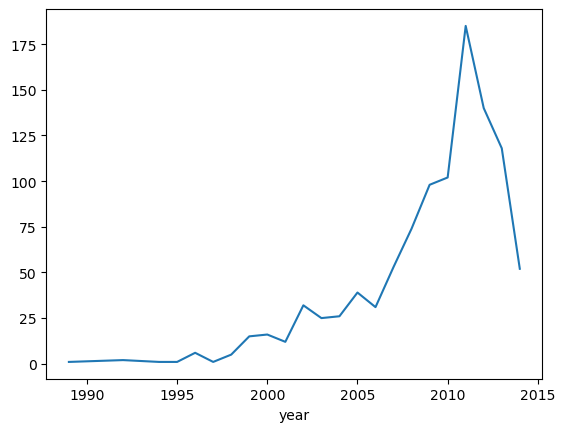

In [34]:
# part 1
print("\n=== Median ===")
print(planets[["orbital_period","mass","distance"]].median())
print("\n=== Mean ===")
print(planets[["orbital_period","mass","distance"]].mean())
print("\n=== 25% Quantile ===")
print(planets[["orbital_period","mass","distance"]].quantile(0.25))
print("\n=== 75% Quantile ===")
print(planets[["orbital_period","mass","distance"]].quantile(0.75))



# part 2
planets.groupby("method")["year"].aggregate([min,max,np.mean,np.median,len])


# part 3: visualization of the trend of discovery over the years(not required)
planets.groupby("year").size().plot()
